In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [384]:
astdys = pd.read_csv('data_files/astdys_tnos.csv')
#print(astdys)
drop_col = []
for i in range(len(astdys)):
    name = astdys['Name'].values[i]
    if i % 100 == 0:
        print(i)
    series = pd.read_csv('TNOs/'+name+'/series.csv',index_col=0)
    #print(series)
    if series['ecc'].values[-1] >= 0.5:
        drop_col.append(i)
    elif series['a'].values[-1] >= 100:
        drop_col.append(i)

print(astdys['Name'].values[drop_col])

0
100
200
300
400
500
600
700
800
900
1000
1100
['33340' '119067' '119069' '307463' '341520' '385571' '385695' '438028'
 '450265' '469362' '470308' '2000 FB8' '2002 CE251' '2002 PU170'
 '2004 EJ96' '2004 MS8' '2005 EX318' '2005 EZ300' '2005 JK186' '2005 TN53'
 '2006 TP130' '2009 JZ18' '2010 JK124' '2010 TJ182' '2010 TT191'
 '2010 VX224' '2011 HM102' '2011 SO277' '2011 UC411' '2011 UD411'
 '2011 VJ24' '2013 FD28' '2013 GU136' '2014 FB62' '2014 JT80' '2014 QO441'
 '2014 WG510' '2014 WQ510' '2014 YJ50']


1132


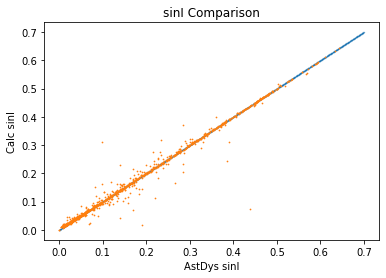

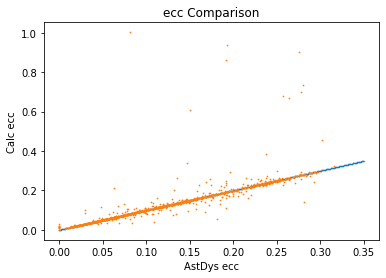

[0.04437814 0.0344267  0.02044679 0.02645428 0.04288556 0.0413245
 0.03898408 0.03033566 0.02143033 0.02649353 0.03179275 0.03349426
 0.02312979 0.03256148 0.03772831 0.01519411 0.01613021 0.02949327
 0.02164442 0.04290317 0.03121493 0.02996484 0.02206989 0.02890398
 0.04323434 0.03375166 0.03880276 0.01826547 0.01657338 0.02000229
 0.02092563 0.04285025 0.02658596 0.04117976 0.02379178 0.02377531
 0.020005   0.03999553 0.03959662 0.02161056 0.02429284 0.04001295
 0.0168394  0.04235415 0.04196017 0.02162364 0.01650896 0.01664353
 0.02017506 0.01473975 0.03177753 0.02871681 0.04423546 0.02851274
 0.02988961 0.03352205 0.04475757 0.00982979 0.03727172 0.0163043
 0.01593438 0.01922355 0.01415625 0.03349196 0.02301267 0.01672315
 0.02027463 0.03526358 0.03367114 0.03445904 0.02732971 0.03917054
 0.03490431 0.02411296 0.02059514 0.04127411 0.0106245  0.03369389
 0.04068586 0.0326595  0.03882797 0.01457569 0.0240718  0.02546704
 0.02337107 0.01197726 0.04121662 0.03458757 0.03686744 0.042124

In [385]:
prop_elem = pd.read_csv('prop_elem_tnos.csv')
prop_elem = prop_elem.drop(drop_cols)

#print(len(drop_cols))
print(len(prop_elem))
#for i in range(len(astdys)):
#    series = pd.read_csv()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=0.5)
plt.title('sinI Comparison')
plt.xlabel('AstDys sinI')
plt.ylabel('Calc sinI')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=0.5)
#plt.gca().set_aspect('equal')
plt.title('ecc Comparison')
plt.xlabel('AstDys ecc')
plt.ylabel('Calc ecc')
plt.show()

print(prop_elem['calc_sinI'].values[np.where((prop_elem['calc_sinI'].values < 0.0447956))])
print(prop_elem['calc_ecc'].values[np.where((prop_elem['calc_ecc'].values > 0.8))])

In [386]:
rms_inc = np.mean((prop_elem['calc_sinI']**2 - prop_elem['ast_sinI']**2)/prop_elem['ast_sinI'])
print(rms_inc)

rms_ecc = np.mean((prop_elem['calc_ecc']**2 - prop_elem['ast_ecc']**2)/prop_elem['ast_ecc'])
print(rms_ecc)

0.002604629194106267
0.6108370683342269


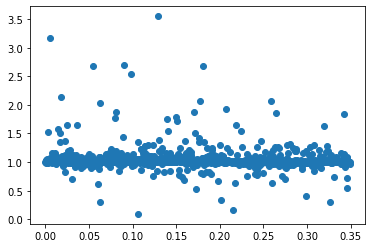

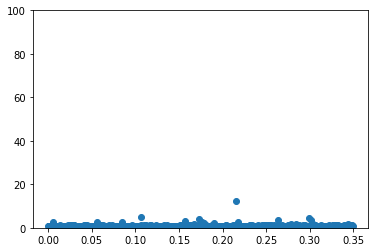

In [389]:
frac_inc = prop_elem['calc_sinI']/prop_elem['ast_sinI']
frac_ecc = prop_elem['calc_ecc']/prop_elem['ast_ecc']

plt.scatter(data,frac_inc)
plt.show()

plt.scatter(data,frac_ecc)
plt.ylim(0,100)
plt.show()